## 'time'indexの作成

In [117]:
import datetime
def day_station0():
    df=pd.read_csv('csv/station/station_id0.csv')
    df['time']=datetime.datetime(df['year'],df['month'],df['day'],df['hour'])
    df
#     for i,d in df.iterrows():
#         d_time=datetime.datetime(d['year'],d['month'],d['day'],d['hour'])
# #         print(time)
#         df['time'][i]=d_time
# #         df_copy.time=df.time.replace(i,d_time)
# #         df_copy.time=df.time.where(df.time==i,d_time)
# #         print(time)
#         print(i)
#     df.to_csv('csv/station/station_id0.csv',index=False)
#     print('ok')



,id,year,month,day,hour,station_id,bikes_available,predict,time
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00
...,...,...,...,...,...,...,...,...,...
17515,17515,2015,8,31,19,0,17.0,0,2015-08-31 19:00:00
17516,17516,2015,8,31,20,0,18.0,0,2015-08-31 20:00:00
17517,17517,2015,8,31,21,0,18.0,0,2015-08-31 21:00:00
17518,17518,2015,8,31,22,0,18.0,0,2015-08-31 22:00:00


## データの可視化(station0のbike情報)

In [2]:
#いろいろインポート
import tensorflow as tf
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('csv/station/station_id0.csv',index_col='time',parse_dates=True)
# # df=df.sort_index(axis=1, ascending=False, inplace=True)
# df
# df_week=df.resample('W').mean()
# df_week['non_lack_of_bikes']=df_week['bikes_available'].interpolate()
# #一旦fillna
# df_week=df_week['2013-9':'2015-9']
# df=df_week['non_lack_of_bikes']
# sns.set(font="Hiragino Maru Gothic Pro",context="talk",style="white")
# plt.figure(figsize=(15,5))
# plt.xticks(rotation=90)
# sns.lineplot(data=df)

ValueError: 'time' is not in list

### 年間の周期性があるのか、週毎の周期性は？

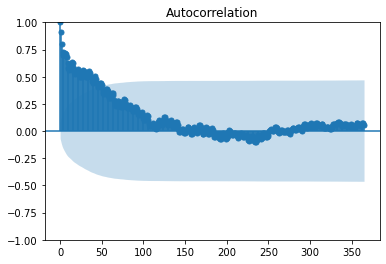

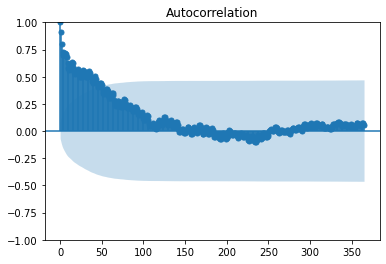

In [4]:
#周期性「自己相関」⇛自分自身をずらしたやつと相関があるのかを調べる。
#自分と自分を365日ずらしたデータに相関がある⇛365の周期性がある
# python -m pip install statsmodels 
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('csv/station/station_id0.csv',index_col='time',parse_dates=True)
df=df.resample('D').mean()
df['non_lack_of_bikes']=df['bikes_available'].interpolate()

sm.graphics.tsa.plot_acf(df['non_lack_of_bikes'],lags=365)

### 曜日で違いはあるのか?

In [8]:
# sm.graphics.tsa.plot_acf(df['non_lack_of_bikes'],lags=7)
df['曜日']=df.index.strftime('%A')
df.groupby('曜日').mean()

,id,year,month,day,hour,station_id,bikes_available,predict,non_lack_of_bikes
曜日,,,,,,,,,
Friday,613223.5,2014.173077,6.461538,16.000000,11.5,34.5,8.513794,0.175080,8.500124
Monday,613211.5,2014.161905,6.590476,15.666667,11.5,34.5,8.435412,0.182540,8.422634
Saturday,613247.5,2014.173077,6.500000,15.836538,11.5,34.5,8.567646,0.211939,8.535304
Sunday,613187.5,2014.161905,6.561905,15.542857,11.5,34.5,8.528193,0.109524,8.501343
Thursday,613199.5,2014.173077,6.432692,15.884615,11.5,34.5,8.471569,0.156651,8.457735
Tuesday,613151.5,2014.153846,6.605769,15.644231,11.5,34.5,8.396837,0.129006,8.381791
Wednesday,613175.5,2014.163462,6.528846,15.471154,11.5,34.5,8.411175,0.138221,8.401543


### どの時間帯がよく使われるのか？

In [62]:
df=pd.read_csv('csv/station/station_id0.csv',index_col='time',parse_dates=True)
df=pd.read_csv('csv/station/station_id0.csv',index_col='time',parse_dates=True)

df_h=groupby('hour').mean()
df_h.sort_values('bikes_available')
'''
16~18時の間が最も使われている時間帯。次に９時位
'''

# df=df['2013-09-01 00:00:00':'2013-12-01 00:00:00']
# df=df['bikes_available']

# sns.set(font="Hiragino Maru Gothic Pro",context="talk",style="white")
# plt.figure(figsize=(15,5))
# plt.xticks(rotation=90)
# sns.lineplot(data=df)
# sm.graphics.tsa.plot_acf(df['bikes_available'],lags=24)

ValueError: cannot reindex from a duplicate axis

## 予測モデルに必要なXの値の作成
今回は求めるのはstationIDのある日にちのある時間を求める。

In [4]:
df=pd.read_csv('csv/station/station_id0.csv',index_col='timestamp',parse_dates=True)
station_df=pd.read_csv('csv/station/station_id0.csv',index_col='timestamp',parse_dates=True)

#0〜1にスケーリング
# df[0:43801]
from sklearn.preprocessing import MinMaxScaler
#index操作
yosoku_index=df.index.get_loc('2014-09-10 00:00:00')
future_num=len(df)-yosoku_index
df=df[:yosoku_index]
df=df[['bikes_available','hour']]

scaler = MinMaxScaler(feature_range=(0, 1))
df_scale = pd.DataFrame(scaler.fit_transform(df),index=df.index,columns=df.columns)

df_train= df_scale[0:yosoku_index-1000]
df_test=df_scale[yosoku_index-1000:yosoku_index]

In [5]:
look_back = 10 #どれくらい過去まで見るか
def create_input_data(data, look_back):    
    raw_data = data.T.values.tolist()
    data_size = len(data) - look_back

    X = [[] for i in range(len(raw_data))] 
    y = [[] for i in range(len(raw_data))] 

    for i in range(data_size):
        for j in range(len(raw_data)):
            X[j].append(raw_data[j][i:i + look_back])
            y[j].append([raw_data[j][i + look_back]])

    X_tmp = X[-1]
    y_tmp = y[-1]
    
    for i in range(len(raw_data)-1):
        X_tmp = np.insert(X_tmp,np.arange(0, (look_back-1)*(i+1)+1, i+1),X[-i-2],axis=1)
        y_tmp = np.insert(y_tmp,np.arange(0, (i+1), i+1),y[-i-2],axis=1)
    
    X = np.array(X_tmp).reshape(data_size, look_back, len(raw_data))
    y = np.array(y_tmp).reshape(data_size, 1, len(raw_data))
    
    return y, X

y_train,X_train = create_input_data(
    data=df_train,
    look_back=look_back
)

y_test,X_test = create_input_data(
    data=df_test,
    look_back=look_back
)


array([[[0.25925926, 0.69565217],
        [0.25925926, 0.73913043],
        [0.22222222, 0.7826087 ],
        ...,
        [0.22222222, 1.        ],
        [0.22222222, 0.        ],
        [0.22222222, 0.04347826]],

       [[0.25925926, 0.73913043],
        [0.22222222, 0.7826087 ],
        [0.22222222, 0.82608696],
        ...,
        [0.22222222, 0.        ],
        [0.22222222, 0.04347826],
        [0.22222222, 0.08695652]],

       [[0.22222222, 0.7826087 ],
        [0.22222222, 0.82608696],
        [0.22222222, 0.86956522],
        ...,
        [0.22222222, 0.04347826],
        [0.22222222, 0.08695652],
        [0.22222222, 0.13043478]],

       ...,

       [[0.18518519, 0.52173913],
        [0.14814815, 0.56521739],
        [0.14814815, 0.60869565],
        ...,
        [0.07407407, 0.82608696],
        [0.11111111, 0.86956522],
        [0.11111111, 0.91304348]],

       [[0.14814815, 0.56521739],
        [0.14814815, 0.60869565],
        [0.14814815, 0.65217391],
        .

# モデルの作成

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

model = Sequential()
x = model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(8))
model.add(Dense(len(df.columns))) #出力層はデータ数に合わせる

#loss⇛損失関数
#optimizer⇛adam、SDG、などがある。
model.compile(loss='mean_squared_error', optimizer='adam')

2021-10-22 00:52:04.899336: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-22 00:52:04.940453: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd6c645dde0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-22 00:52:04.940466: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [7]:
history = model.fit(X_train, y_train, epochs=1, batch_size=1)

7966/7966 [==============================] - 26s 3ms/step - loss: 0.0244


990/990 [==============================] - 1s 1ms/step - loss: nan


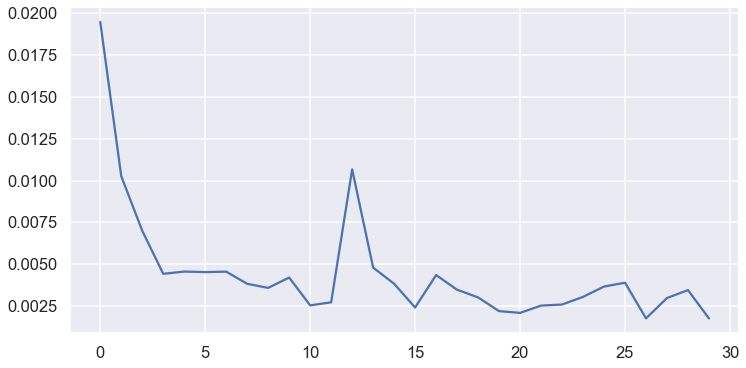

In [132]:
model.evaluate(X_test,y_test,batch_size=1)
sns.set(context="talk")
fig = plt.subplots(figsize=(12,6))
plt.plot(history.history['loss'])

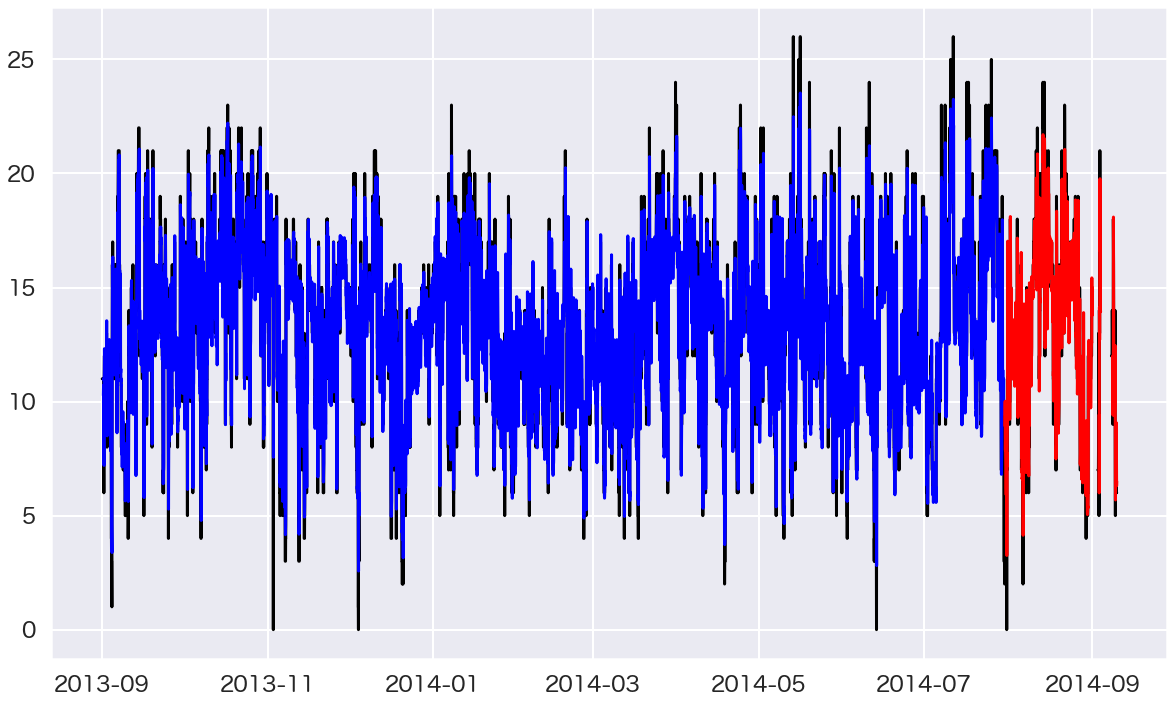

In [148]:
sns.set(context="poster",font="Hiragino Maru Gothic Pro")
fig = plt.subplots(figsize=(20,12))

#正解のプロット
df= pd.DataFrame(scaler.inverse_transform(df_scale),
                       index=df.index,columns=df.columns)
plt.plot(df[:yosoku_index]["bikes_available"],color="black")

#学習用データ予測結果のプロット
df_train_pred = pd.DataFrame(scaler.inverse_transform(model.predict(X_train)),
                                  index=df_train.index[look_back:],columns=df_train.columns)
plt.plot(df_train_pred[0:]["bikes_available"],color="blue")

#評価用データ予測結果のプロット
df_test_pred = pd.DataFrame(scaler.inverse_transform(model.predict(X_test)),
                                 index=df_test.index[look_back:],columns=df_test.columns)
plt.plot(df_test_pred[0:]["bikes_available"],color="red")


In [125]:
## 未来の予測

In [9]:
#未来予測
future_steps = future_num
X_future = [df_test[-look_back:].values.tolist()]
y_future_list = []

for step in range(future_steps):
    y_future = model.predict(X_future)
    y_future_list.append(y_future[0])
    X_future = [X_future[0][1:] + y_future.tolist()]
    
    
df_future = pd.DataFrame(scaler.inverse_transform(y_future_list),
                              index=pd.date_range('2014-09-01 01:00:00', periods=future_steps, freq='60T'),columns=df.columns)
plt.plot(df_future[0:]["bikes_available"],color="green")

df_train= df_scale[0:yosoku_index-1000]
df_test=df_scale[yosoku_index-1000:yosoku_index]

df_head=df[0:yosoku_index]
df
df_foward=df[yosoku_index:]
df_foward['bikes_available']=df_future['bikes_available']
df=df_head.append(df_foward)


KeyboardInterrupt: 

In [57]:
station_df=pd.read_csv('csv/station/station_id0.csv',index_col='timestamp',parse_dates=True)
df_head=station_df[0:yosoku_index]
df_foward=station_df[yosoku_index:]
df_foward['bikes_available']=list(df_future['future_bikes'])
df=df_head.append(df_foward)
df.to_csv('csv/future0.csv')

/var/folders/gn/djvsb3z11ds_3z9j8_kmvb9r0000gn/T/ipykernel_29314/3151064412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foward['bikes_available']=list(df_future['future_bikes'])


In [155]:
df.to_csv('yosoku0.csv',index=False)

In [ ]:
## 切ったデータフレームを元通りにする方法Append

In [154]:

df1 = pd.DataFrame({'one': [1,2,3], 'two': [10,20,30]}, index=['a','b','c'])
df_a=df1[0:1]
df_b=df1[1:3]
df=df_a.append(df_b)


SyntaxError: invalid character in identifier (3685359461.py, line 4)

予測index===8761
future_num====8759


2021-10-24 20:52:02.251214: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-24 20:52:02.363332: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe8c12f9af0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-24 20:52:02.363348: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


990/990 [==============================] - 1s 1ms/step - loss: 0.0108
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2021-10-24 20:52:30.062070: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/station_model65/assets


/var/folders/gn/djvsb3z11ds_3z9j8_kmvb9r0000gn/T/ipykernel_62110/2929251656.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back['bikes_available']=list(df_future['bikes_available'])


予測index===8761
future_num====8759
990/990 [==============================] - 1s 1ms/step - loss: nan
INFO:tensorflow:Assets written to: model/station_model66/assets


/var/folders/gn/djvsb3z11ds_3z9j8_kmvb9r0000gn/T/ipykernel_62110/2929251656.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back['bikes_available']=list(df_future['bikes_available'])


予測index===8761
future_num====8759
990/990 [==============================] - 1s 1ms/step - loss: nan
INFO:tensorflow:Assets written to: model/station_model67/assets


/var/folders/gn/djvsb3z11ds_3z9j8_kmvb9r0000gn/T/ipykernel_62110/2929251656.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back['bikes_available']=list(df_future['bikes_available'])


予測index===8761
future_num====8759
990/990 [==============================] - 1s 1ms/step - loss: nan
INFO:tensorflow:Assets written to: model/station_model68/assets


/var/folders/gn/djvsb3z11ds_3z9j8_kmvb9r0000gn/T/ipykernel_62110/2929251656.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back['bikes_available']=list(df_future['bikes_available'])


予測index===8761
future_num====8759
990/990 [==============================] - 2s 2ms/step - loss: nan
INFO:tensorflow:Assets written to: model/station_model69/assets


/var/folders/gn/djvsb3z11ds_3z9j8_kmvb9r0000gn/T/ipykernel_62110/2929251656.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back['bikes_available']=list(df_future['bikes_available'])


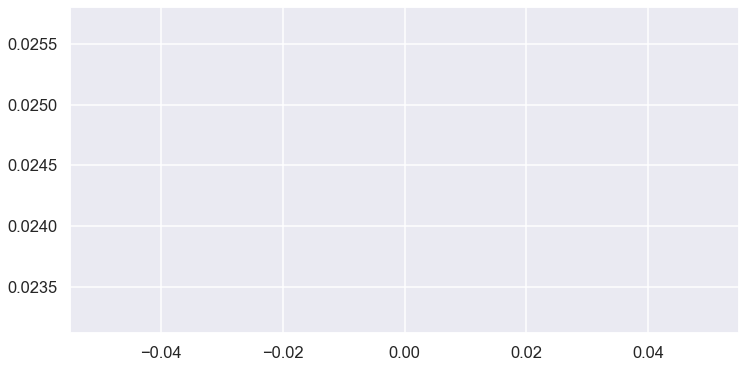

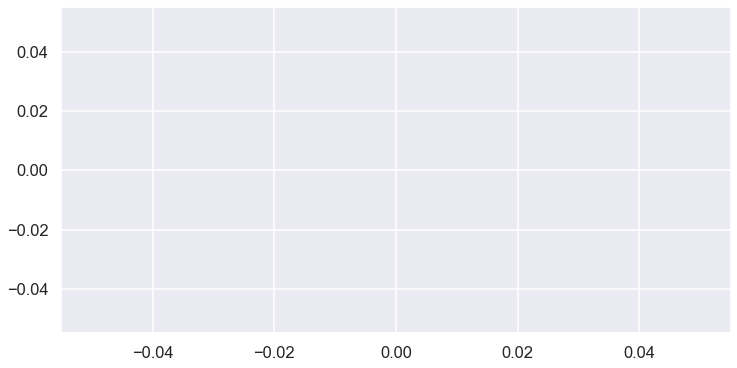

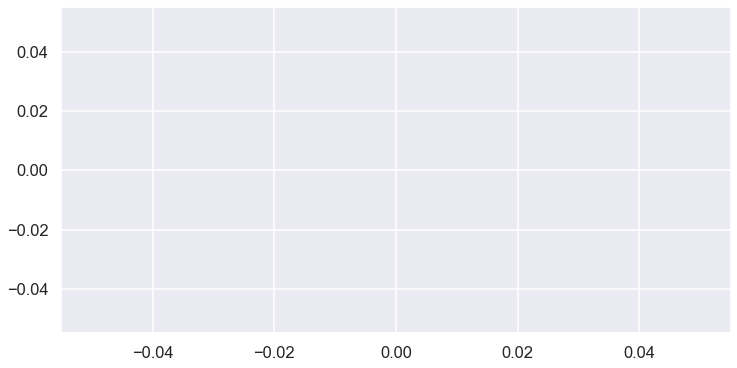

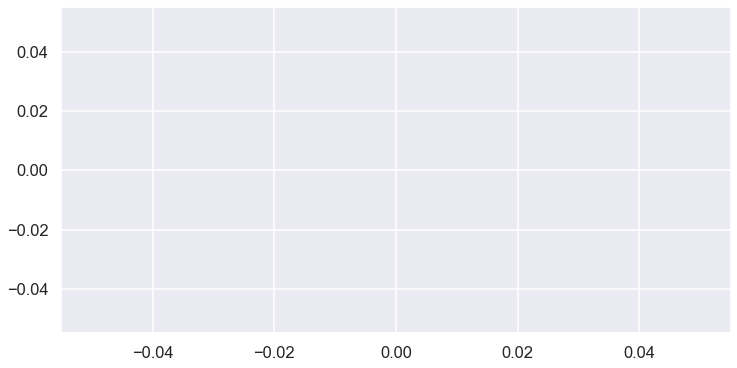

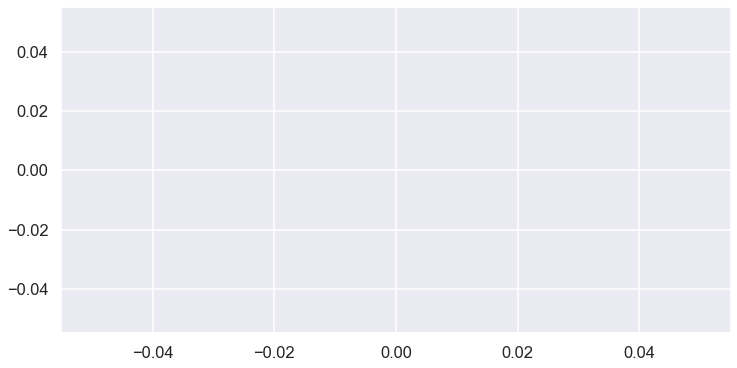

In [1]:
# station_0から70まで上の作業を行い、future/f_station_id0.csvで保存する
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
#いろいろインポート
import tensorflow as tf
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(65,70):
    station_id=i
    df=pd.read_csv('csv/station/station_id{}.csv'.format(station_id),index_col='timestamp',parse_dates=True)
    station_df=df.copy()
    #index操作
    yosoku_index=df.index.get_loc('2014-09-01 01:00:00')
    future_num=len(df)-yosoku_index
    print('予測index==={}'.format(yosoku_index))
    print('future_num===={}'.format(future_num))
    df=df[:yosoku_index]
    df=df[['bikes_available','hour']]
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scale = pd.DataFrame(scaler.fit_transform(df),index=df.index,columns=df.columns)
    df_train= df_scale[:yosoku_index-1000]
    df_test=df_scale[yosoku_index-1000:yosoku_index]

    look_back = 10 #どれくらい過去まで見るか
    def create_input_data(data, look_back):    
        raw_data = data.T.values.tolist()
        data_size = len(data) - look_back

        X = [[] for i in range(len(raw_data))] 
        y = [[] for i in range(len(raw_data))] 

        for i in range(data_size):
            for j in range(len(raw_data)):
                X[j].append(raw_data[j][i:i + look_back])
                y[j].append([raw_data[j][i + look_back]])

        X_tmp = X[-1]
        y_tmp = y[-1]

        for i in range(len(raw_data)-1):
            X_tmp = np.insert(X_tmp,np.arange(0, (look_back-1)*(i+1)+1, i+1),X[-i-2],axis=1)
            y_tmp = np.insert(y_tmp,np.arange(0, (i+1), i+1),y[-i-2],axis=1)

        X = np.array(X_tmp).reshape(data_size, look_back, len(raw_data))
        y = np.array(y_tmp).reshape(data_size, 1, len(raw_data))

        return y, X

    y_train,X_train = create_input_data(
        data=df_train,
        look_back=look_back
    )

    y_test,X_test = create_input_data(
        data=df_test,
        look_back=look_back
    )
    model = Sequential()
    x = model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(8))
    model.add(Dense(len(df.columns))) #出力層はデータ数に合わせる

    #loss⇛損失関数
    #optimizer⇛adam、SDG、などがある。
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(X_train, y_train, epochs=1, batch_size=1)
    model.evaluate(X_test,y_test,batch_size=1)
    sns.set(context="talk")
    fig = plt.subplots(figsize=(12,6))
    plt.plot(history.history['loss'])
    plt.savefig("loss/station_loss_history{}.png".format(station_id)) 

    #modelの保存
    # Calling `save('my_model')` creates a SavedModel folder `my_model`.
    model.save("model/station_model{}".format(station_id))

    # It can be used to reconstruct the model identically.
    # reconstructed_model = keras.models.load_model("my_model")


    #未来予測
    future_steps = future_num
    X_future = [df_test[-look_back:].values.tolist()]
    y_future_list = []

    for step in range(future_steps):
        y_future = model.predict(X_future)
        y_future_list.append(y_future[0])
        X_future = [X_future[0][1:] + y_future.tolist()]


    df_future = pd.DataFrame(scaler.inverse_transform(y_future_list),
                                  index=pd.date_range('2014-09-01 01:00:00', periods=future_steps, freq='60T'),columns=df.columns)
    #     plt.plot(df_future[0:]["bikes_available"],color="green")


    #df⇛予測した
    df_head=station_df[0:yosoku_index]
    df_back=station_df[yosoku_index:]
    df_back['bikes_available']=list(df_future['bikes_available'])
    df_back.to_csv('csv/future_back/back_station_id{}.csv'.format(station_id),index=False)
    df_f=df_head.append(df_back)
    df_f.to_csv('CSV/future/fstation_id{}.csv'.format(station_id),index=False)
#     print('df_backの長さ==={}'.format(len(df_back)))
#     print('df_futureの長さ==={}'.format(len(df_future)))
    
# def main():
#     for station_id in range(70):
#         make_future_station(station_id)
    
    
    
    
    

予測index===8761
future_num====8759
990/990 [==============================] - 1s 1ms/step - loss: nan
INFO:tensorflow:Assets written to: model/station_model66/assets


/var/folders/gn/djvsb3z11ds_3z9j8_kmvb9r0000gn/T/ipykernel_62110/395294642.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back['bikes_available']=list(df_future['bikes_available'])


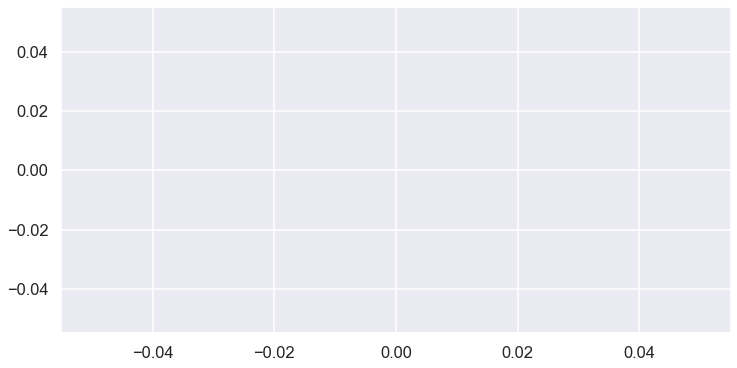

In [2]:
# station_0から70まで上の作業を行い、future/f_station_id0.csvで保存する
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
#いろいろインポート
import tensorflow as tf
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

station_id=66
df=pd.read_csv('csv/station/station_id{}.csv'.format(station_id),index_col='timestamp',parse_dates=True)
station_df=df.copy()
#index操作
yosoku_index=df.index.get_loc('2014-09-01 01:00:00')
future_num=len(df)-yosoku_index
print('予測index==={}'.format(yosoku_index))
print('future_num===={}'.format(future_num))
df=df[:yosoku_index]
df=df[['bikes_available','hour']]
scaler = MinMaxScaler(feature_range=(0, 1))
df_scale = pd.DataFrame(scaler.fit_transform(df),index=df.index,columns=df.columns)
df_train= df_scale[:yosoku_index-1000]
df_test=df_scale[yosoku_index-1000:yosoku_index]

look_back = 10 #どれくらい過去まで見るか
def create_input_data(data, look_back):    
    raw_data = data.T.values.tolist()
    data_size = len(data) - look_back

    X = [[] for i in range(len(raw_data))] 
    y = [[] for i in range(len(raw_data))] 

    for i in range(data_size):
        for j in range(len(raw_data)):
            X[j].append(raw_data[j][i:i + look_back])
            y[j].append([raw_data[j][i + look_back]])

    X_tmp = X[-1]
    y_tmp = y[-1]

    for i in range(len(raw_data)-1):
        X_tmp = np.insert(X_tmp,np.arange(0, (look_back-1)*(i+1)+1, i+1),X[-i-2],axis=1)
        y_tmp = np.insert(y_tmp,np.arange(0, (i+1), i+1),y[-i-2],axis=1)

    X = np.array(X_tmp).reshape(data_size, look_back, len(raw_data))
    y = np.array(y_tmp).reshape(data_size, 1, len(raw_data))

    return y, X

y_train,X_train = create_input_data(
    data=df_train,
    look_back=look_back
)

y_test,X_test = create_input_data(
    data=df_test,
    look_back=look_back
)
model = Sequential()
x = model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(8))
model.add(Dense(len(df.columns))) #出力層はデータ数に合わせる

#loss⇛損失関数
#optimizer⇛adam、SDG、などがある。
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=1, batch_size=1)
model.evaluate(X_test,y_test,batch_size=1)
sns.set(context="talk")
fig = plt.subplots(figsize=(12,6))
plt.plot(history.history['loss'])
plt.savefig("loss/station_loss_history{}.png".format(station_id)) 

#modelの保存
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("model/station_model{}".format(station_id))

# It can be used to reconstruct the model identically.
# reconstructed_model = keras.models.load_model("my_model")


#未来予測
future_steps = future_num
X_future = [df_test[-look_back:].values.tolist()]
y_future_list = []

for step in range(future_steps):
    y_future = model.predict(X_future)
    y_future_list.append(y_future[0])
    X_future = [X_future[0][1:] + y_future.tolist()]


df_future = pd.DataFrame(scaler.inverse_transform(y_future_list),
                              index=pd.date_range('2014-09-01 01:00:00', periods=future_steps, freq='60T'),columns=df.columns)
#     plt.plot(df_future[0:]["bikes_available"],color="green")


#df⇛予測した
df_head=station_df[0:yosoku_index]
df_back=station_df[yosoku_index:]
df_back['bikes_available']=list(df_future['bikes_available'])
df_back.to_csv('csv/future_back/back_station_id{}.csv'.format(station_id),index=False)
df_f=df_head.append(df_back)
df_f.to_csv('CSV/future/fstation_id{}.csv'.format(station_id),index=False)
#     print('df_backの長さ==={}'.format(len(df_back)))
#     print('df_futureの長さ==={}'.format(len(df_future)))
    
# def main():
#     for station_id in range(70):
#         make_future_station(station_id)

In [24]:
df65=pd.read_csv('csv/future_back/back_station_id65.csv')
# df66=pd.read_csv('csv/future_back/back_station_id66.csv')
df67=pd.read_csv('csv/future_back/back_station_id67.csv')
df68=pd.read_csv('csv/future_back/back_station_id68.csv')
df69=pd.read_csv('csv/future_back/back_station_id69.csv')

print( len(df65))
print(len(df66))
print(len(df67))
print(len(df68))
print(len(df69))


# df66['bikes_available']=list(df65['bikes_available'])
#df66はいじらない
df67['bikes_available']=list(df65['bikes_available'])
df68['bikes_available']=list(df65['bikes_available'])
df69['bikes_available']=list(df65['bikes_available'])
# df66.to_csv('csv/future_back/back_station_id66.csv',index=False)
df67.to_csv('csv/future_back/back_station_id67.csv',index=False)
df68.to_csv('csv/future_back/back_station_id68.csv',index=False)
df69.to_csv('csv/future_back/back_station_id69.csv',index=False)



8759
17520
8759
8759
8759


In [12]:
df23=pd.read_csv('csv/future_back/back_station_id23.csv')
df24=pd.read_csv('csv/future_back/back_station_id24.csv')
df65=pd.read_csv('csv/future_back/back_station_id65.csv')
df66=pd.read_csv('csv/future_back/back_station_id65.csv')

df66['bikes_available']=list(df65['bikes_available'])
df24['bikes_available']=list(df23['bikes_available'])
df24.to_csv('csv/future_back/back_station_id24.csv',index=False)
df66.to_csv('csv/future_back/back_station_id66.csv',index=False)

In [18]:
df24=pd.read_csv('csv/future_back/back_station_id23.csv')
df25=pd.read_csv('csv/future_back/back_station_id25.csv')

df25['bikes_available']=list(df24['bikes_available'])
df25.to_csv('csv/future_back/back_station_id25.csv',index=False)

In [ ]:
df66=pd.read_csv('csv/future_back/back_station_id65.csv')

df66=df66[120:]
df66=df66.groupby('predict').get_group(1)



In [20]:
df68=pd.read_csv('csv/future_back/back_station_id68.csv')
df69=pd.read_csv('csv/future_back/back_station_id69.csv')
df69['bikes_available']=list(df68['bikes_available'])
df69.to_csv('csv/future_back/back_station_id69.csv',index=False)

In [16]:
df65=pd.read_csv('csv/future/fstation_id65.csv')
df66=pd.read_csv('csv/future/fstation_id66.csv')
df66['bikes_available']=list(df65['bikes_available'])
df66.to_csv('csv/future_back/back_station_id66.csv',index=False)

In [17]:
df39=pd.read_csv('csv/future/fstation_id39.csv')
df39.to_csv('csv/future_back/back_station_id39.csv',index=False)